In [72]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None
tf.random.set_seed(0)

# download the data
df=pd.read_csv('future_values.csv')

y = df['KW'].fillna(method='ffill')
y = y.values.reshape(-1, 1)

# scale the data
y

array([[ 87.97333333],
       [ 86.76      ],
       [ 88.26      ],
       ...,
       [119.26      ],
       [111.4       ],
       [104.24      ]])

In [73]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)

# generate the input and output sequences
y

array([[0.48841513],
       [0.48167888],
       [0.49000666],
       ...,
       [0.66211415],
       [0.61847657],
       [0.57872529]])

In [74]:
n_lookback = 500  # length of input sequences (lookback period)
n_forecast = 300  # length of output sequences (forecast period)

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

# fit the model


In [75]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=10, batch_size=32, verbose=0)



In [76]:
# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

In [77]:
df

,Date&Time,KW
0,2021-01-01 00:00:00,87.973333
1,2021-01-01 01:00:00,86.760000
2,2021-01-01 02:00:00,88.260000
3,2021-01-01 03:00:00,89.340000
4,2021-01-01 04:00:00,87.820000
...,...,...
17218,2022-08-24 20:00:00,124.560000
17219,2022-08-24 21:00:00,122.460000
17220,2022-08-24 22:00:00,119.260000
17221,2022-08-24 23:00:00,111.400000


In [86]:
D=df.reset_index()
D.drop(['index'],inplace=True,axis=1)
D

,Date&Time,KW
0,2021-01-01 00:00:00,87.973333
1,2021-01-01 01:00:00,86.760000
2,2021-01-01 02:00:00,88.260000
3,2021-01-01 03:00:00,89.340000
4,2021-01-01 04:00:00,87.820000
...,...,...
17218,2022-08-24 20:00:00,124.560000
17219,2022-08-24 21:00:00,122.460000
17220,2022-08-24 22:00:00,119.260000
17221,2022-08-24 23:00:00,111.400000


In [87]:
D.rename(columns={'index': 'Date&Time', 'KW': 'Actual'}, inplace=True)
D

,Date&Time,Actual
0,2021-01-01 00:00:00,87.973333
1,2021-01-01 01:00:00,86.760000
2,2021-01-01 02:00:00,88.260000
3,2021-01-01 03:00:00,89.340000
4,2021-01-01 04:00:00,87.820000
...,...,...
17218,2022-08-24 20:00:00,124.560000
17219,2022-08-24 21:00:00,122.460000
17220,2022-08-24 22:00:00,119.260000
17221,2022-08-24 23:00:00,111.400000


In [88]:
D['Forecast'] = np.nan
D['Forecast'].iloc[-1] = D['Actual'].iloc[-1]
D

,Date&Time,Actual,Forecast
0,2021-01-01 00:00:00,87.973333,NaN
1,2021-01-01 01:00:00,86.760000,NaN
2,2021-01-01 02:00:00,88.260000,NaN
3,2021-01-01 03:00:00,89.340000,NaN
4,2021-01-01 04:00:00,87.820000,NaN
...,...,...,...
17218,2022-08-24 20:00:00,124.560000,NaN
17219,2022-08-24 21:00:00,122.460000,NaN
17220,2022-08-24 22:00:00,119.260000,NaN
17221,2022-08-24 23:00:00,111.400000,NaN


In [89]:
D = D.astype({"Date&Time":'object'})
D

,Date&Time,Actual,Forecast
0,2021-01-01 00:00:00,87.973333,NaN
1,2021-01-01 01:00:00,86.760000,NaN
2,2021-01-01 02:00:00,88.260000,NaN
3,2021-01-01 03:00:00,89.340000,NaN
4,2021-01-01 04:00:00,87.820000,NaN
...,...,...,...
17218,2022-08-24 20:00:00,124.560000,NaN
17219,2022-08-24 21:00:00,122.460000,NaN
17220,2022-08-24 22:00:00,119.260000,NaN
17221,2022-08-24 23:00:00,111.400000,NaN


In [90]:
D1 = pd.DataFrame(columns=['Date&Time', 'Actual', 'Forecast'])
D1= D1.astype({"Date&Time":'object'})
D1

,Date&Time,Actual,Forecast


In [92]:
D1['Date&Time'] = pd.date_range(start=D['Date&Time'].iloc[-1] , periods=n_forecast)
D1['Date&Time']

0     2022-08-25
1     2022-08-26
2     2022-08-27
3     2022-08-28
4     2022-08-29
         ...    
295   2023-06-16
296   2023-06-17
297   2023-06-18
298   2023-06-19
299   2023-06-20
Name: Date&Time, Length: 300, dtype: datetime64[ns]

In [95]:
D1['Forecast'] = Y_.flatten()
#D1.drop(['Date'],inplace=True,axis=1)
D1

,Date&Time,Actual,Forecast
0,2022-08-25,NaN,103.868599
1,2022-08-26,NaN,104.339874
2,2022-08-27,NaN,102.479980
3,2022-08-28,NaN,105.425926
4,2022-08-29,NaN,103.488144
...,...,...,...
295,2023-06-16,NaN,108.544518
296,2023-06-17,NaN,108.305595
297,2023-06-18,NaN,111.201660
298,2023-06-19,NaN,112.451935


In [96]:
results = D.append(D1).set_index('Date&Time')
results

,Actual,Forecast
Date&Time,,
2021-01-01 00:00:00,87.973333,NaN
2021-01-01 01:00:00,86.760000,NaN
2021-01-01 02:00:00,88.260000,NaN
2021-01-01 03:00:00,89.340000,NaN
2021-01-01 04:00:00,87.820000,NaN
...,...,...
2023-06-16 00:00:00,NaN,108.544518
2023-06-17 00:00:00,NaN,108.305595
2023-06-18 00:00:00,NaN,111.201660


<AxesSubplot:title={'center':'AAPL'}, xlabel='Date&Time'>

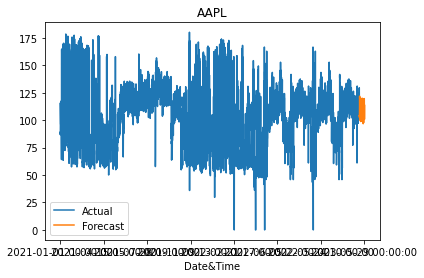

In [97]:
results.plot(title='AAPL')